Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [26]:
library(tidymodels)

The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [27]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))
#factor(Outcome) changes it into a categorical variable (0 or 1)
# can also do as.numeric(Outcome) - 1 

split = initial_split(diabetes, strata = Outcome)
# splits 75% training set, 25% testing set 

diabetes_train = training(split) # pulls out the training portion
diabetes_test = testing(split) # pulls out the testing portion

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [29]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 4, 1, 3, 8, 1, 13, 5, 3, 10, 4, 11, …
$ Glucose                  <dbl> 85, 89, 116, 110, 103, 126, 99, 97, 145, 117,…
$ BloodPressure            <dbl> 66, 66, 74, 92, 30, 88, 84, 66, 82, 92, 58, 7…
$ SkinThickness            <dbl> 29, 23, 0, 0, 38, 41, 0, 15, 19, 0, 11, 31, 3…
$ Insulin                  <dbl> 0, 94, 0, 0, 83, 235, 0, 140, 110, 0, 54, 0, …
$ BMI                      <dbl> 26.6, 28.1, 25.6, 37.6, 43.3, 39.3, 35.4, 23.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.191, 0.183, 0.704, 0.3…
$ Age                      <dbl> 31, 21, 30, 30, 33, 27, 50, 22, 57, 38, 22, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The 'Outcome' variable in the data, since it has been encoded as either 0 or 1

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BMI         |  Body mass index (weight in kg/(height in m)^2)|

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

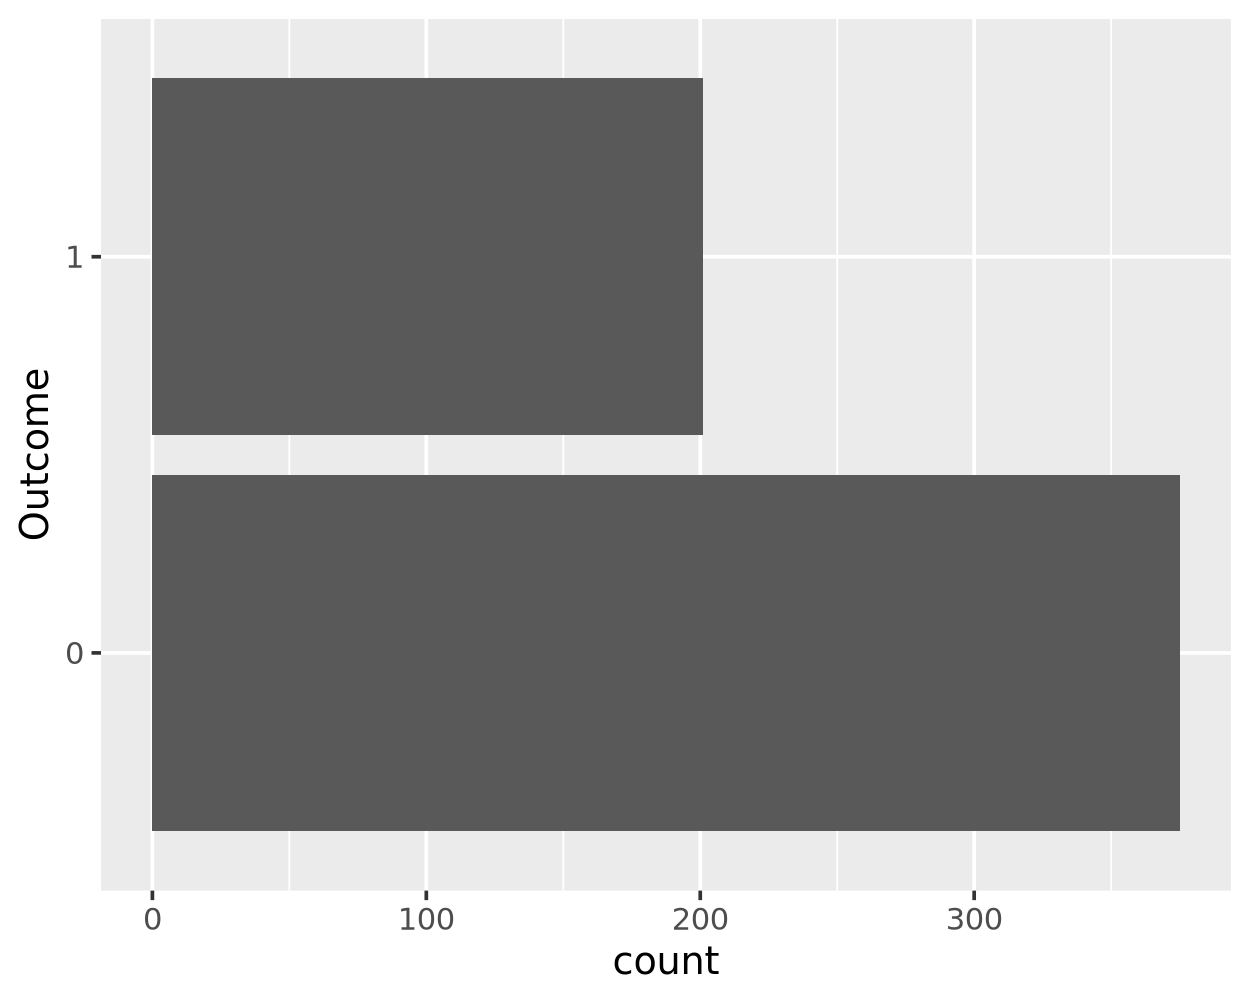

In [30]:
ggplot(diabetes_train, aes(y= Outcome)) + geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

The data is not balance, there are almost 2x as many rows that document occurances of Outcome = 0 as compared to when Outcome = 1



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [31]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))
# extract the three relevant columns
# separate the Glucose and BMI readings into two separate rows
# converts them into key–value pairs in long format (i.e for each observation theres are two separate rows)

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

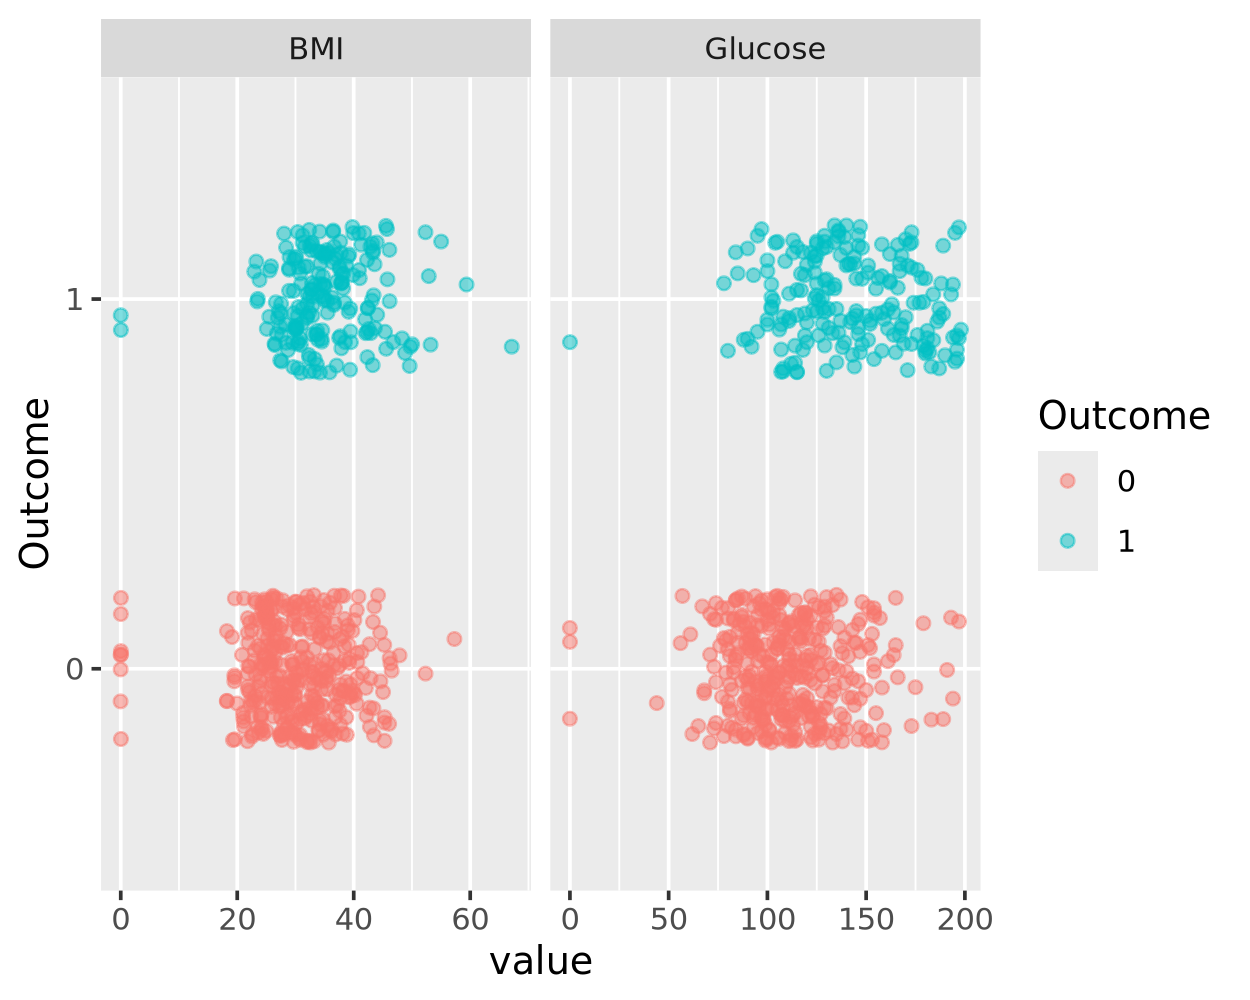

In [33]:
ggplot(plot_df, aes(x = value, y = Outcome, color = Outcome)) + 
    geom_jitter(alpha = 0.5, height = 0.2) +
    facet_wrap(~name, ncol = 2, scales = 'free_x')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

When you remove the free_x, it puts both charts on the same x axis. When it is removed, both x axises are on a scale from 0 to 200. But once you add it adjusts the x axises so that it varies between BMI and Glucose. 

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [34]:
mod = logistic_reg() |> set_engine('glm')

mod_fit = mod |> fit(Outcome ~ BMI + Glucose, diabetes_train)


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [35]:
#predict(mod_fit, diabetes_test, type = 'prob')

diabetes_test_wPred <- augment(mod_fit, diabetes_test)

head(diabetes_test_wPred)


.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.6879230,0.31207698,10,115,0,0,0,35.3,0.134,29,0
0,0.6366986,0.36330142,10,139,80,0,0,27.1,1.441,57,0
0,0.7508163,0.24918374,9,119,80,35,0,29.0,0.263,29,1
0,0.7198577,0.28014230,5,109,75,26,0,36.0,0.546,60,0
1,0.4008206,0.59917942,3,158,76,36,245,31.6,0.851,28,1
0,0.9348657,0.06513431,6,92,92,0,0,19.9,0.188,28,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [36]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 116  34
         1   9  33

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

In the test data, there were 33 + 34 = 67 individuals with diabetes. Of those who actually had diabetes, it was predicted that only 35 of them  had diabetes. There were 16 individuals that were predicted to have diabetes that did not have diabetes. This isn't a question, but the data set had significantly more examples of Outcome = 0, and I think the confusion matrix shows this imbalance. There are more Truth = 0 and the error for that is much lower (accuracy is 0.928) than when Truth = 1 (accuracy is .493)